## Total Electron Content (TEC) from JPL GIM

+ One figure with multi subplots for the distance map view of all dates

In [2]:
%matplotlib inline
import os
import re
import glob
import pickle
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt, ticker

from mintpy.objects import timeseries
from mintpy.utils import ptime, readfile, utils as ut, plot as pp
from tools.simulation import iono
from tools import iono_tec
from offset import utils
plt.rcParams.update({'font.size': 12})
figsize = [9, 3]

# location of interest
win = 5  # half size of the window of interest
lalo = [-21.29, -69.58]; box_suffix = 'boxCL'   # box in the center left with low  altitude; box = (10,  55,  20, 70) for SenAT149
lalo = [-21.30, -67.39]; box_suffix = 'boxLR'   # box in the lower right with high altitude; box = (200, 15, 215, 30) for SenAT149

# dir
proj_dir = os.path.expanduser('~/data/geolocation/ChileSenAT149')
#proj_dir = os.path.expanduser('~/data/geolocation/ChileSenDT156')
work_dir = os.path.join(proj_dir, 'offset_comp', box_suffix)
os.chdir(work_dir)
print('Go to directory', work_dir)

Go to directory /Users/yunjunz/data/geolocation/ChileSenAT149/offset_comp/boxLR


### Dataset: Chile Sen asc 149

incidence angle on the ground     min/max: 30.0/46.1 deg
incidence angle on the ionosphere min/max: 27.9/42.3 deg
center lat/lon  on the ground    : -21.0438/-68.4108 deg
center lat/lon  on the ionosphere: -18.1416/-69.1286 deg


/Users/yunjunz/tools/dev/tools/simulation/iono.py:120: RuntimeWarning: invalid value encountered in sin
  cos_inc_angle_iono = np.sqrt(1 - (EARTH_RADIUS * np.sin(inc_angle) / (EARTH_RADIUS + iono_height))**2)


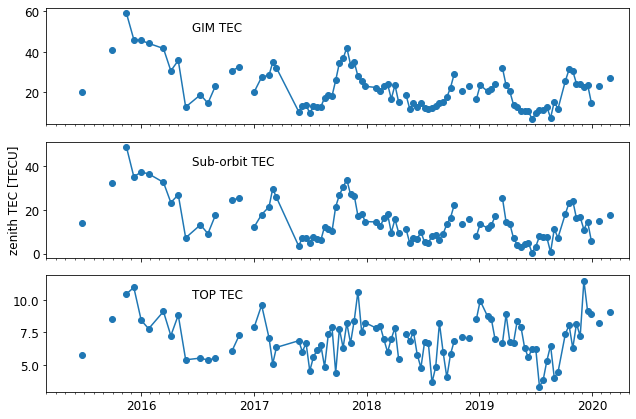

incidence angle on the ground     min/max: 30.0/46.1 deg
incidence angle on the ionosphere min/max: 27.9/42.3 deg
center lat/lon  on the ground    : -21.0438/-68.4108 deg
center lat/lon  on the ionosphere: -18.1416/-69.1286 deg
calculating ionospheric phase ramp time-series from TEC ...
[=================>      35%                       ] 20171005    0s /     0s

/Users/yunjunz/tools/dev/tools/simulation/iono.py:120: RuntimeWarning: invalid value encountered in sin
  cos_inc_angle_iono = np.sqrt(1 - (EARTH_RADIUS * np.sin(inc_angle) / (EARTH_RADIUS + iono_height))**2)
/Users/yunjunz/tools/dev/tools/simulation/iono.py:54: RuntimeWarning: invalid value encountered in cos
  tec = vtec / np.cos(inc_angle * np.pi / 180.0)


[==================================================] 20200228    0s /     0s 
delete exsited file: /Users/yunjunz/data/geolocation/ChileSenAT149/mintpy_offset/inputs/gimTEC.h5
create HDF5 file: /Users/yunjunz/data/geolocation/ChileSenAT149/mintpy_offset/inputs/gimTEC.h5 with w mode
create dataset /date       of |S8        in size of (104,)               with compression=None
create dataset /vtec       of float32    in size of (104,)               with compression=None
create dataset /timeseries of float32    in size of (104, 123, 231)      with compression=None
create dataset /vtec_gim   of float32    in size of (104,)               with compression=None
create dataset /vtec_top   of float32    in size of (104,)               with compression=None
create dataset /vtec_sub   of float32    in size of (104,)               with compression=None
finished writing to /Users/yunjunz/data/geolocation/ChileSenAT149/mintpy_offset/inputs/gimTEC.h5
incidence angle on the ground     min/max: 30.0/46

'/Users/yunjunz/data/geolocation/ChileSenAT149/mintpy_offset/inputs/subTEC.h5'

In [3]:
proj_dir = os.path.expanduser('~/data/geolocation/ChileSenAT149')
ts_file   = os.path.join(proj_dir, 'mintpy_offset/timeseriesRg.h5')
geom_file = os.path.join(proj_dir, 'mintpy_offset/inputs/geometryRadar.h5')
tec_gim_file = os.path.join(proj_dir, 'mintpy_offset/inputs/gimTEC.h5')
tec_sub_file = os.path.join(proj_dir, 'mintpy_offset/inputs/subTEC.h5')

# read GIM/TOP TEC data from Xiaoqing
gim_tec_dir = os.path.join(proj_dir, 'GIM_TEC')
date_list = timeseries(ts_file).get_date_list()
lat_iono, lon_iono = iono.prep_geometry_iono_shell_along_los(geom_file, print_msg=True)[1:3]
gim_tec, top_tec, sub_tec = iono.get_sub_tec_list(gim_tec_dir, date_list, lat_iono, lon_iono)[1:4]

# plot
x = ptime.date_list2vector(date_list)[0]
titles = ['GIM TEC', 'Sub-orbit TEC', 'TOP TEC']
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=[9, 6], sharex=True)
for i, vtec in enumerate([gim_tec, sub_tec, top_tec]):
    axs[i].plot(x, vtec, 'o-')
    axs[i].annotate(titles[i], xy=(0.25, 0.8), xycoords='axes fraction')
ax = axs[1]
ax.set_ylabel('zenith TEC [TECU]')
pp.auto_adjust_xaxis_date(ax, x)
fig.tight_layout()
plt.show()

# calc iono ramp time-series
ds_dict_ext = {}
ds_dict_ext['vtec_gim'] = np.array(gim_tec, dtype=np.float32)
ds_dict_ext['vtec_top'] = np.array(top_tec, dtype=np.float32)
ds_dict_ext['vtec_sub'] = np.array(sub_tec, dtype=np.float32)

iono_tec.vtec2iono_ramp_timeseries(date_list, gim_tec.tolist(), geom_file=geom_file, iono_file=tec_gim_file, ds_dict_ext=ds_dict_ext)
iono_tec.vtec2iono_ramp_timeseries(date_list, sub_tec.tolist(), geom_file=geom_file, iono_file=tec_sub_file, ds_dict_ext=ds_dict_ext)

### Dataset: Chile Sen desc 156

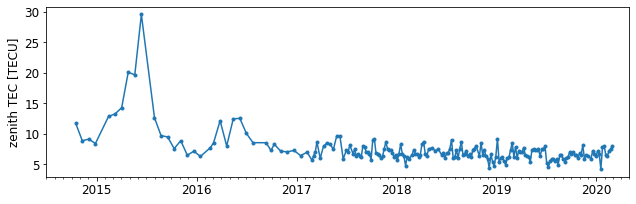

incidence angle on the ground     min/max: 30.8/46.2 deg
incidence angle on the ionosphere min/max: 28.6/42.4 deg
center lat/lon  on the ground    : -21.1462/-68.1329 deg
center lat/lon  on the ionosphere: -24.0925/-68.7790 deg
calculating ionospheric phase ramp time-series from TEC ...
[==================================================] 20200229    0s /     0s 
create HDF5 file: /Users/yunjunz/data/geolocation/ChileSenDT156/mintpy_offset/inputs/gimTEC.h5 with w mode
create dataset /date       of |S8        in size of (201,)               with compression=None
create dataset /vtec       of float32    in size of (201,)               with compression=None
create dataset /timeseries of float32    in size of (201, 157, 232)      with compression=None
finished writing to /Users/yunjunz/data/geolocation/ChileSenDT156/mintpy_offset/inputs/gimTEC.h5


'/Users/yunjunz/data/geolocation/ChileSenDT156/mintpy_offset/inputs/gimTEC.h5'

In [5]:
proj_dir = os.path.expanduser('~/data/geolocation/ChileSenDT156')
ts_file   = os.path.join(proj_dir, 'mintpy_offset/timeseriesRg.h5')
geom_file = os.path.join(proj_dir, 'mintpy_offset/inputs/geometryRadar.h5')
iono_file = os.path.join(proj_dir, 'mintpy_offset/inputs/gimTEC.h5')

# read GIM TEC data from Xiaoqing
gim_tec_file = os.path.join(proj_dir, 'GIM_TEC', 'gimtec_sent1.txt')
fc = np.loadtxt(gim_tec_file, dtype=bytes).astype(str)
date_list = fc[:, 0].tolist()
vtec_list = fc[:, 1].astype(np.float32).tolist()

# plot
x = ptime.date_list2vector(date_list)[0]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[9, 3])
ax.plot(x, vtec_list, 'o-', ms=3)
ax.set_ylabel('zenith TEC [TECU]')
pp.auto_adjust_xaxis_date(ax, x)
fig.tight_layout()
plt.show()

# calc iono ramp time-series
iono_tec.vtec2iono_ramp_timeseries(date_list, vtec_list, geom_file=geom_file, iono_file=iono_file)

### 1. calc / write GIM TEC

In [4]:
geom_file = os.path.join(proj_dir, 'mintpyOffset/inputs/geometryRadar.h5')
atr = readfile.read_attribute(geom_file)
box = None
if box is None:
    length, width = int(atr['LENGTH']), int(atr['WIDTH'])
    box = (0, 0, width, length)
y = int((box[1] + box[3]) / 2)
x = int((box[0] + box[2]) / 2)
box = (x, y, x+1, y+1)

# geometry on the ground
head_angle = float(atr['HEADING'])
inc_angle_ground = readfile.read(geom_file, datasetName='incidenceAngle', box=box)[0][0,0]
lat_ground = readfile.read(geom_file, datasetName='latitude',  box=box)[0][0,0]
lon_ground = readfile.read(geom_file, datasetName='longitude', box=box)[0][0,0]

# geometry at the ionospheric shell
iono_height = 450e3     # height of the ionospheric piercing point in m
inc_angle_iono = ut.incidence_angle_ground2iono_shell_along_los(inc_angle_ground, iono_height=iono_height)
lat_iono, lon_iono = ut.lalo_ground2iono_shell_along_los(lat_ground, lon_ground,
                                                         inc_angle=inc_angle_ground,
                                                         head_angle=head_angle,
                                                         iono_height=iono_height)

print('heading   angle: {:.1f} deg'.format(head_angle))
print('incidence angle on the ground: {:.1f} deg'.format(inc_angle_ground))
print('incidence angle at ionosphere: {:.1f} deg'.format(inc_angle_iono))
print('SAR scene center on the ground in lat/lon: {:.1f}/{:.1f}'.format(lat_ground, lon_ground))
print('SAR scene center at ionosphere in lat/lon: {:.1f}/{:.1f}'.format(lat_iono, lon_iono))
print('SAR acquisition time UTC: {} hours'.format(float(atr['CENTER_LINE_UTC']) / 3600.))

heading   angle: -167.6 deg
incidence angle on the ground: 39.8 deg
incidence angle at ionosphere: 36.7 deg
SAR scene center on the ground in lat/lon: -21.1/-68.1
SAR scene center at ionosphere in lat/lon: -24.2/-68.8
SAR acquisition time UTC: 10.005 hours


In [ ]:
# calc / interpolate / write GIM TEC
date_list, gim_tec, top_tec, sub_tec, gTecList = iono.get_gim_tec(gim_tec_dir, lat_iono, lon_iono, interp_method='median')
tDict = utils.save_gim_tec(out_file, date_list, gim_tec, top_tec, sub_tec, inc_angle=inc_angle_iono)

### 2.1 plot - subTEC

save figure to file /Users/yunjunz/data/Tarapaca/SenAT149/offset_comp/boxLR/subTECgim.png


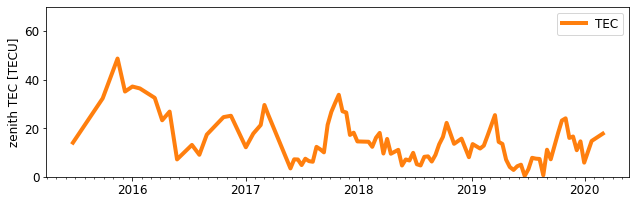

In [3]:
## plot
def plot_sub_tec_ts(tDict, suffix=''):
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(tDict['time'], tDict['subTEC'], linewidth=4, color='C1', label='TEC')
    pp.auto_adjust_xaxis_date(ax, tDict['time'], every_year=1, buffer_year=None)
    ax.set_ylabel('zenith TEC [TECU]')
    ax.set_ylim(0, 70)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
    ax.legend()
    fig.tight_layout()

    # output
    out_fig = os.path.join(os.path.dirname(out_file), 'subTECgim{}.png'.format(suffix))
    print('save figure to file', out_fig)
    plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
    plt.show()
    return

plot_sub_tec_ts(tDict)

### 2.2 plot - delay prediction

save figure to file /Users/yunjunz/data/Tarapaca/SenAT149/offset_comp/boxLR/TECgim_pred.png


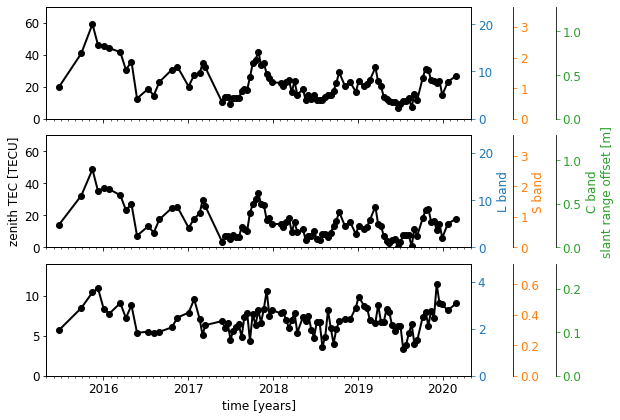

In [12]:
## data
tec_types = ['TEC', 'subTEC', 'topTEC']
bands = ['Cband', 'Sband', 'Lband']

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=[9, 6], sharex=True)
for i in range(len(bands)):
    tec_type = tec_types[i]

    ## plot
    ax = axs[i]
    ax.plot(tDict['time'], tDict[tec_type], '-o', label=tec_type, color='k', ms=6, lw=2)

    # axis format
    if i in [0, 1]:
        ax.set_ylim(0, 70)
    else:
        ax.set_ylim(0, 14)

    #ax.annotate(tec_type, xy=(0.23, 0.8), xycoords='axes fraction')

    # TEC ytick
    colors = ['C0', 'C1', 'C2']
    for j in range(len(bands)):
        band = bands[2-j]
        key_off = 'range_delay4{b}_{t}'.format(b=band, t=tec_type)
        pos = 1.0 + 0.1 * j
        c = colors[j]
        label = '{} band'.format(band.split('band')[0])
        if j == 2:
            label += '\nslant range offset [m]'

        ax2 = ax.twinx()
        ax2.spines['right'].set_position(('axes', pos))
        ax2.tick_params(which='both', axis='y', colors=c)

        ratio = ((np.max(tDict[key_off])  - np.min(tDict[key_off])) /
                 (np.max(tDict[tec_type]) - np.min(tDict[tec_type])))
        ax2.set_ylim(ymin=ax.get_ylim()[0] * ratio,
                     ymax=ax.get_ylim()[1] * ratio)

        if i == 1:
            ax2.set_ylabel(label, color=c)

pp.auto_adjust_xaxis_date(axs[-1], tDict['time'], every_year=1, buffer_year=None)
axs[-1].set_xlim(dt.datetime(2015, 5, 1), dt.datetime(2020, 5, 1))
axs[-1].set_xlabel('time [years]')
axs[1].set_ylabel('zenith TEC [TECU]')
fig.tight_layout()
fig.subplots_adjust(hspace=0.15)

# output
out_fig = os.path.join(os.path.dirname(out_file), 'TECgim_pred.png')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()

## Backups

### 1. latitude distance between TEC TPP and SAR

min/max distance : 0.0/3.4 deg
save figure to file /Users/yunjunz/data/Tarapaca/SenAT149/offset_comp/boxLR/TECgim_latDist.png


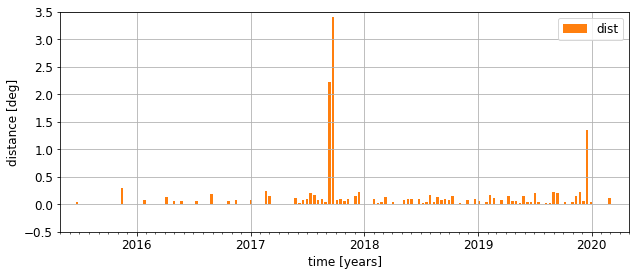

In [5]:
# calc nearest TOP TEC in latitude only
num_date = len(date_list)
lat_dist = np.zeros(num_date, dtype=np.float32)
for i in range(num_date):
    lats = gTecList[i]['lat']
    lat_dist[i] = np.min(np.abs(lats - lat_iono))
print('min/max distance : {:.1f}/{:.1f} deg'.format(np.min(lat_dist), np.max(lat_dist)))

## plot
fig, ax = plt.subplots(figsize=[9, 4])
ax.bar(tDict['time'], lat_dist, width=8, color='C1', label='dist')
ax.set_xlim(dt.datetime(2015, 5, 1), dt.datetime(2020, 5, 1))
ax.set_ylim(-0.5, 3.5)
ax.set_xlabel('time [years]')
ax.set_ylabel('distance [deg]')
pp.auto_adjust_xaxis_date(ax, tDict['time'], every_year=1, buffer_year=None)
ax.grid('on')

ax.legend()
ax.grid('on')
fig.tight_layout()

# output
out_fig = os.path.join(os.path.dirname(out_file), 'TECgim_latDist.png')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()

### 2. location between TEC TPP and SAR

[==================================================] 20200228    0s /     0s 
save figure to file /Users/yunjunz/data/Tarapaca/SenAT149/offset_comp/boxLR/TECgim_loc.png


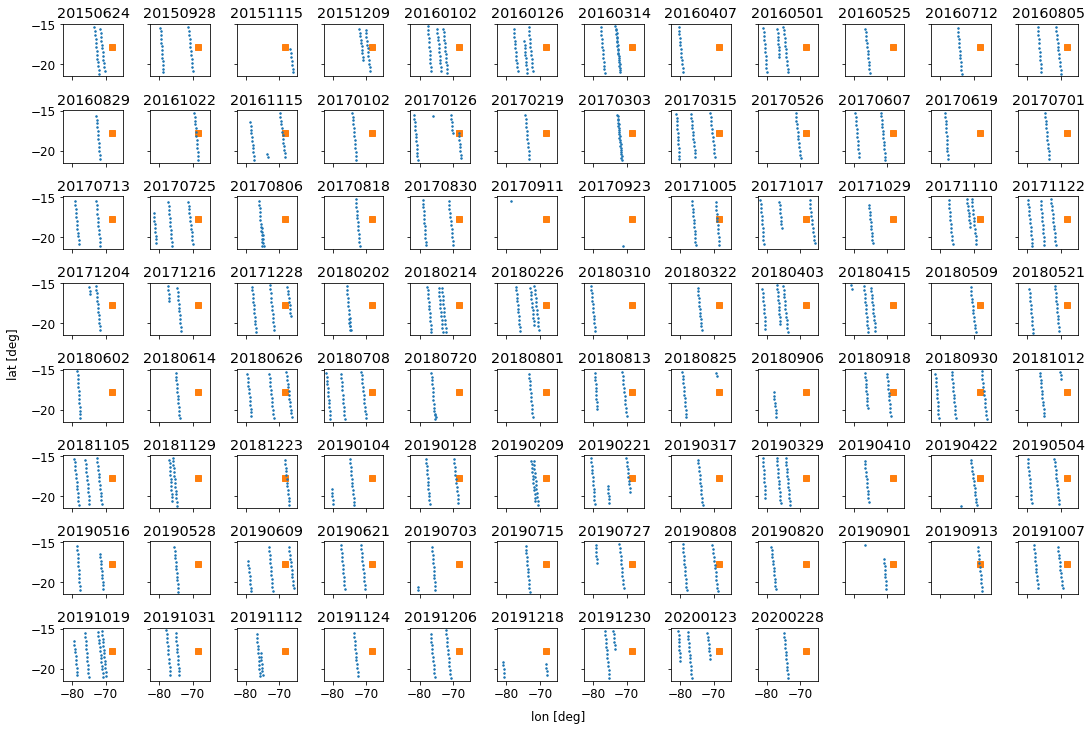

In [10]:
fig, axs = plt.subplots(figsize=[15, 10], nrows=8, ncols=12, sharex=True, sharey=True)
prog_bar = ptime.progressBar(maxValue=num_date)
for i in range(num_date):
    ax = axs.flatten()[i]
    lats = gTecList[i]['lat']
    lons = gTecList[i]['lon']

    # plot
    ax.plot(lon_iono, lat_iono, 's', color='C1', label='TGT')                   # SAR
    ax.plot(lons,     lats,     '.', color='C0', label='TPP', ms=3)             # TPP
    ax.set_title(date_list[i])

    prog_bar.update(i+1, suffix=date_list[i])
prog_bar.close()

for i in range(num_date, axs.size):
    axs.flatten()[i].set_visible(False)

# axis format
fig.text(0.5, -0.01, 'lon [deg]', ha='center')
fig.text(-0.01, 0.5, 'lat [deg]', va='center', rotation='vertical')
fig.tight_layout()

# output
out_fig = os.path.join(os.path.dirname(out_file), 'TECgim_loc.png')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()

### 3. Impact of interpolation method for TOPTEC

TOP TEC from **median** gives the smallest final residual (SAR - subTEC - ERA5 - SET).

save figure to file /Users/yunjunz/data/Tarapaca/SenAT149/offset_comp/boxLR/subTECgim_nearestLatLon.png


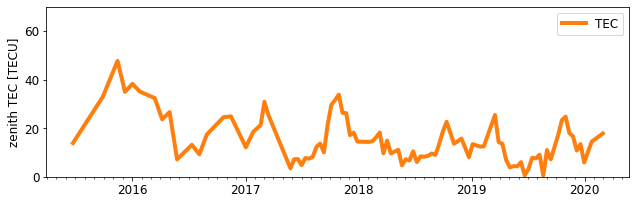

TOP TEC interpolation method of   nearestLatLon with final residual: 6.62 cm
save figure to file /Users/yunjunz/data/Tarapaca/SenAT149/offset_comp/boxLR/subTECgim_nearest.png


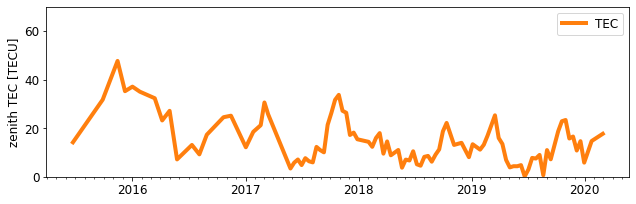

TOP TEC interpolation method of         nearest with final residual: 6.42 cm
save figure to file /Users/yunjunz/data/Tarapaca/SenAT149/offset_comp/boxLR/subTECgim_linear.png


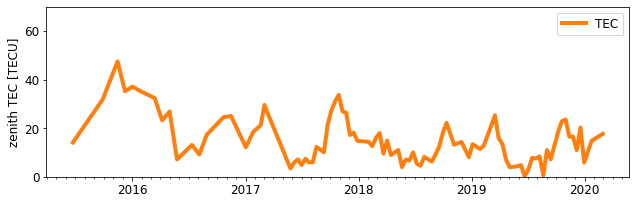

TOP TEC interpolation method of          linear with final residual: 6.57 cm
save figure to file /Users/yunjunz/data/Tarapaca/SenAT149/offset_comp/boxLR/subTECgim_mean.png


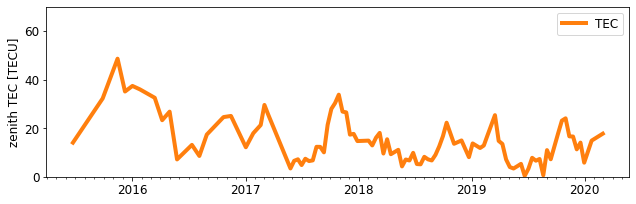

TOP TEC interpolation method of            mean with final residual: 6.49 cm
save figure to file /Users/yunjunz/data/Tarapaca/SenAT149/offset_comp/boxLR/subTECgim_median.png


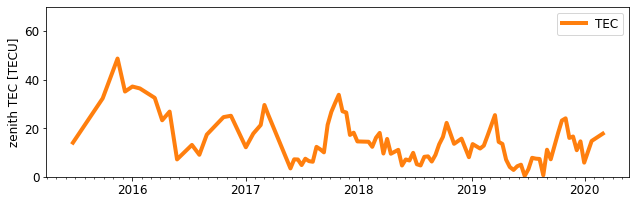

TOP TEC interpolation method of          median with final residual: 6.35 cm


In [11]:
interp_methods = ['nearestLatLon', 'nearest', 'linear', 'mean', 'median']
for interp_method in interp_methods:

    # calc / write / plot GIM TEC pickle file
    fname = os.path.join(work_dir, 'TECgim_{}.pickle'.format(interp_method))
    date_list, gim_tec, top_tec, sub_tec = iono.get_gim_tec(gim_tec_dir, lat_iono, lon_iono, interp_method=interp_method)[:4]
    tDict = utils.save_gim_tec(fname, date_list, gim_tec, top_tec, sub_tec, inc_angle=inc_angle_iono, print_msg=False)
    plot_sub_tec_ts(tDict, suffix='_{}'.format(interp_method))

    # read offsets from all sources
    fbaseDict={
        'SAR' : 'sar',
        'GIM' : 'TECgim_{}'.format(interp_method),
        'IGS' : 'TECigs',
        'ERA' : 'era5',
        'SET' : 'set',
    }
    dDict, flag = utils.read_offset_files(work_dir, fbaseDict, print_msg=False)

    # Calculate final residual: SAR - subTEC - ERA5 - SET
    x1  = dDict['GIM']['time']
    y1  = dDict['SAR']['range_offset_med'][flag]
    y1 -= dDict['GIM']['range_delay4Cband_subTEC']
    y1 -= dDict['ERA']['range_delay_tropo_med'][flag]
    y1 -= dDict['SET']['range_delay_SET_med'][flag] * -1

    # temporal referencing
    dt_s1ab = dt.datetime(2016, 10, 7)    # dateime separating S1A and S1B
    y1 -= np.median(y1[x1 > dt_s1ab])

    # residual RMSE
    rmse = np.sqrt(np.sum(y1 **2) / (y1.size - 1))

    print('TOP TEC interpolation method of {:>15} with final residual: {:.2f} cm'.format(interp_method, rmse*100))